## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [6]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [12]:
import numpy as np

# Columns where 0 means missing
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN in those columns
diabetes_data[cols_with_missing] = diabetes_data[cols_with_missing].replace(0, np.nan)

# Verify replacement
diabetes_data[cols_with_missing].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

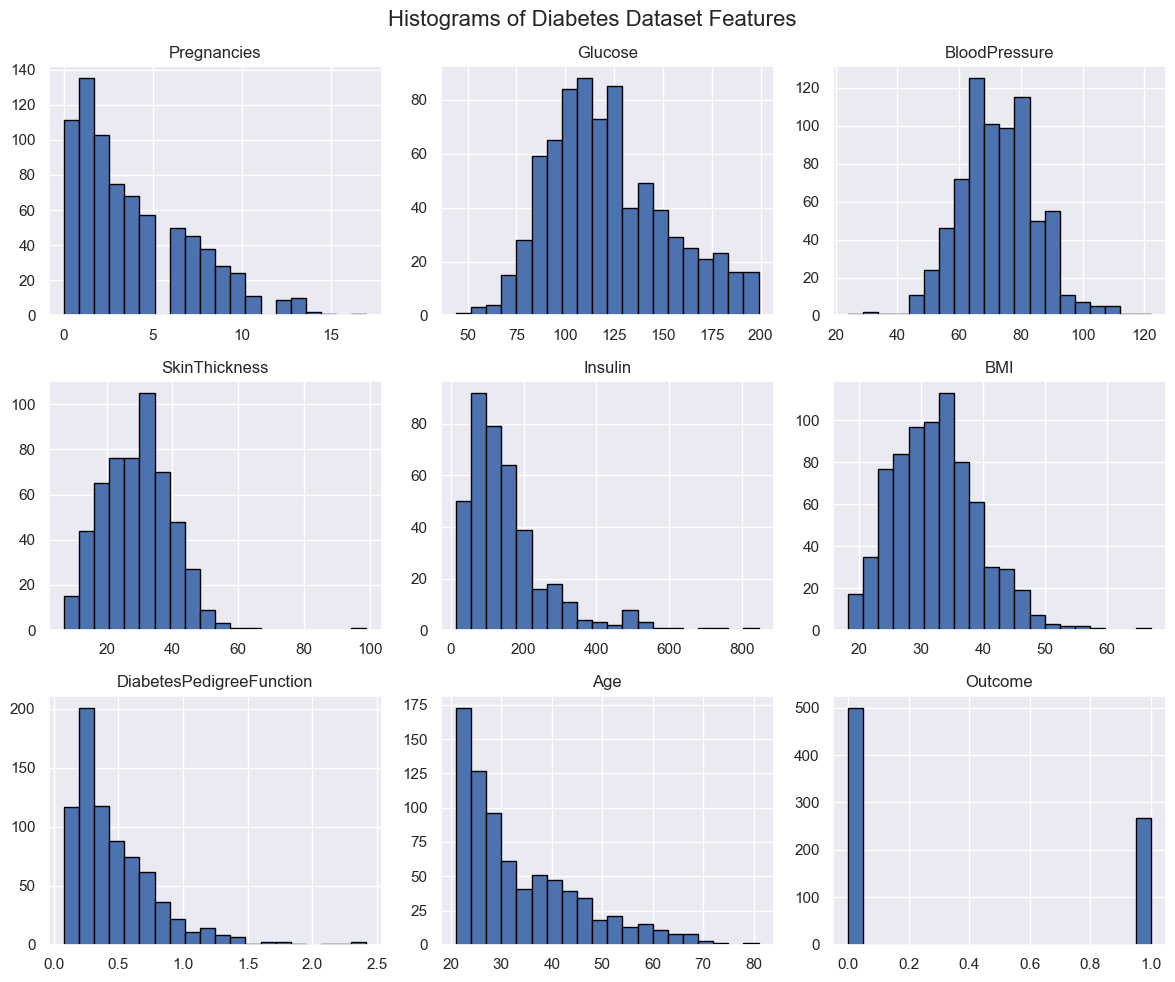

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for all columns
diabetes_data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [16]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

/var/folders/rg/qgl1z3mn0gj3j5qjz1gcl5fh0000gn/T/ipykernel_55847/2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
/var/folders/rg/qgl1z3mn0gj3j5qjz1gcl5fh0000gn/T/ipykernel_55847/2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

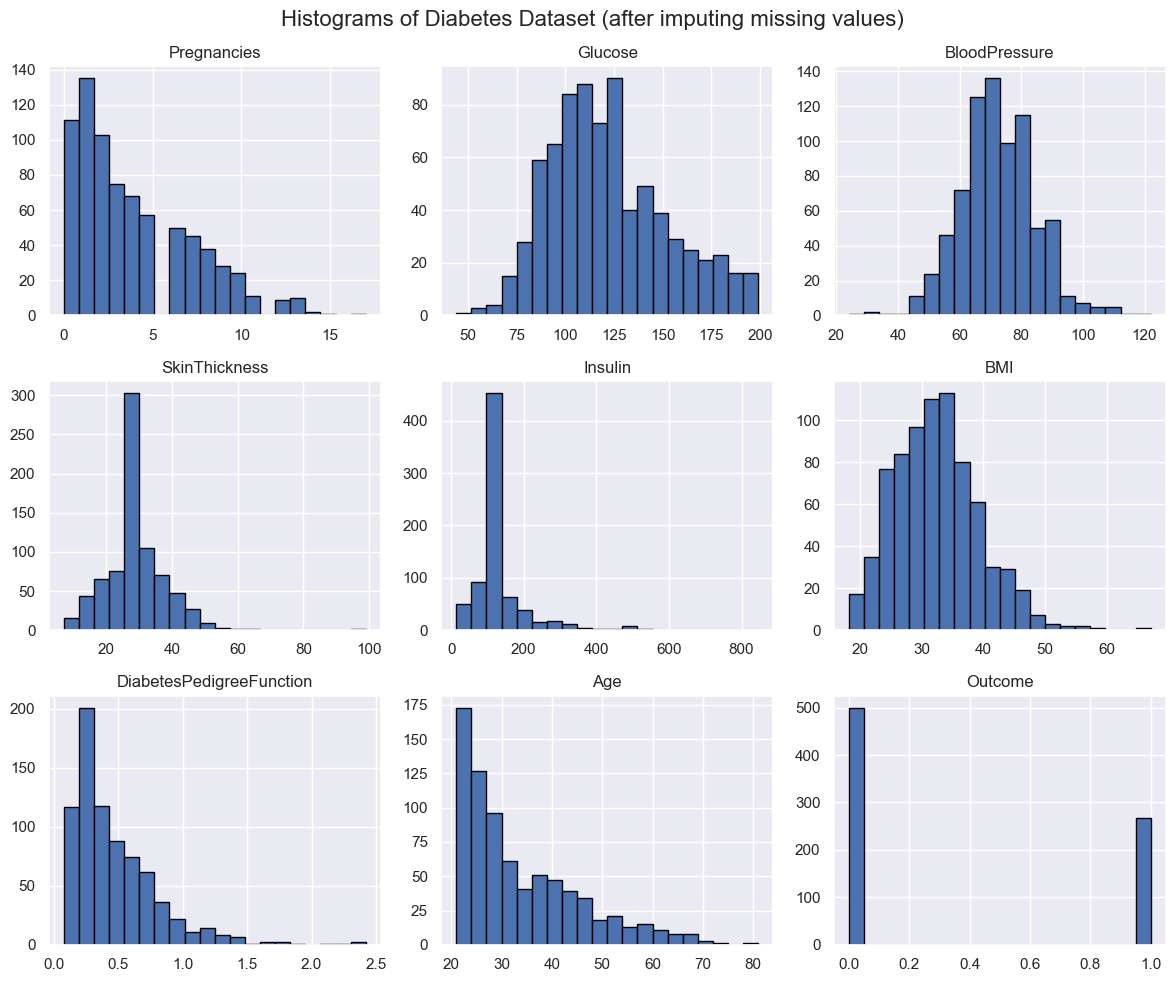

In [18]:
import matplotlib.pyplot as plt

# Plot histograms again after imputing NaN values
diabetes_data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Diabetes Dataset (after imputing missing values)", fontsize=16)
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


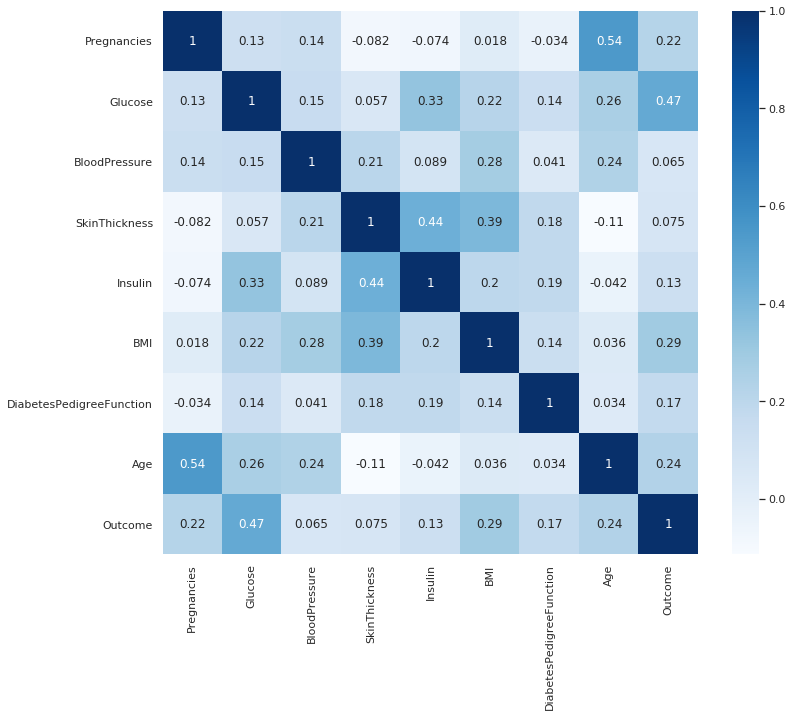

In [15]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [24]:
# Define the target variable (label)
y = diabetes_data['Outcome']

# Preview
print("y: ",y.head())

# Define feature set
X = diabetes_data.drop('Outcome', axis=1)

# Preview
print("X: ", X.head())

y:  0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
X:     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [26]:
from sklearn.model_selection import train_test_split

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Show the shapes to confirm
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (537, 8) (537,)
Test set shape: (231, 8) (231,)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (optional, for readability)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Check the result
print("Scaled training data (first 5 rows):")
print(X_train_scaled.head())

Scaled training data (first 5 rows):
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
209     0.931383  2.085753       0.965518       0.498532 -0.163932  0.428910   
176     0.632606 -1.222867       0.472716       0.013767 -0.163932 -0.210550   
147    -0.562502 -0.521038      -0.677154       0.740915 -0.239259 -0.314648   
454    -0.562502 -0.721561      -1.498489      -0.107425 -0.415020  0.770947   
636     0.333829 -0.587879       0.144182       0.013767 -0.163932 -0.567458   

     DiabetesPedigreeFunction       Age  
209                 -0.374779  0.632129  
176                 -0.294168  0.716992  
147                  2.745172  0.038086  
454                  0.052162 -0.810548  
636                 -0.977870  1.226172  


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [28]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)   # use scaled data
    
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Print results
print("k | Train Score | Test Score")
print("-"*30)
for i in range(1, 10):
    print(f"{i:<2} | {train_scores[i-1]:.4f}    | {test_scores[i-1]:.4f}")

k | Train Score | Test Score
------------------------------
1  | 1.0000    | 0.7186
2  | 0.8436    | 0.7229
3  | 0.8622    | 0.7403
4  | 0.8287    | 0.7403
5  | 0.8343    | 0.7446
6  | 0.8101    | 0.7403
7  | 0.8063    | 0.7359
8  | 0.8063    | 0.7489
9  | 0.8007    | 0.7446


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [38]:
best_k_train = np.argmax(train_scores) + 1   # +1 because index starts at 0
best_train_score = max(train_scores)
print(f"Best training score: {best_train_score:.4f} at k = {best_k_train}")

Best training score: 1.0000 at k = 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [40]:
best_k_test = np.argmax(test_scores) + 1
best_test_score = max(test_scores)

print(f"Best testing score:  {best_test_score:.4f} at k = {best_k_test}")

Best testing score:  0.7489 at k = 8


Plot the train and test model performance by number of neighbors.

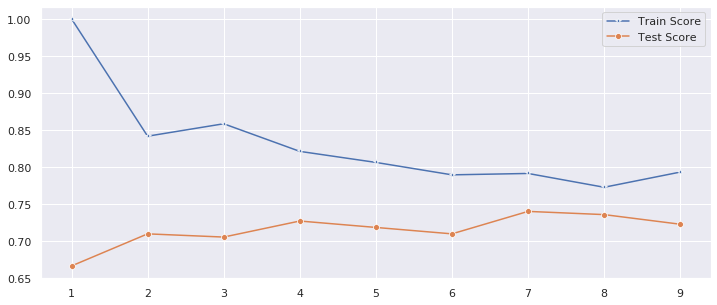

In [33]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

Selected best k (by test accuracy): 8
Final Test Accuracy (k=8): 0.7489

Classification Report:
              precision    recall  f1-score   support

           0     0.7644    0.8867    0.8210       150
           1     0.7018    0.4938    0.5797        81

    accuracy                         0.7489       231
   macro avg     0.7331    0.6902    0.7003       231
weighted avg     0.7424    0.7489    0.7364       231



<Figure size 400x300 with 0 Axes>

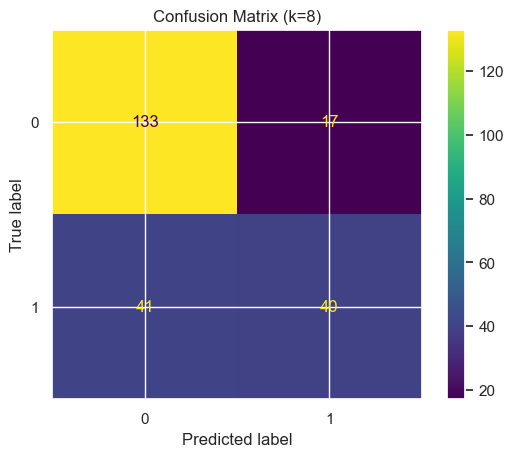

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Choose best k by test accuracy
best_k = int(np.argmax(test_scores) + 1)
print(f"Selected best k (by test accuracy): {best_k}")

# 2) Fit final model with best k on scaled training data
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# 3) Evaluate on scaled test data
y_pred = final_knn.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy (k={best_k}): {test_acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 4) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(4,3))
disp.plot(values_format='d')
plt.title(f"Confusion Matrix (k={best_k})")
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

<Figure size 500x400 with 0 Axes>

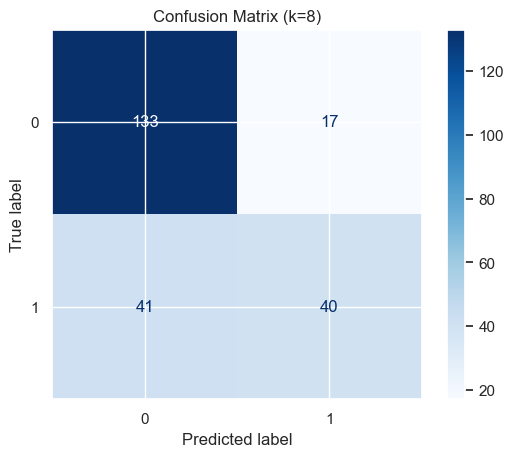

In [44]:
# Compute confusion matrix using the final model
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_knn.classes_)
plt.figure(figsize=(5,4))
disp.plot(cmap="Blues", values_format='d')
plt.title(f"Confusion Matrix (k={best_k})")
plt.show()

**<font color='teal'> Print the classification report </font>**

In [46]:
# Generate predictions using the final model
y_pred = final_knn.predict(X_test_scaled)

# Print classification report
print("Classification Report (k=8):")
print(classification_report(y_test, y_pred, digits=4))

Classification Report (k=8):
              precision    recall  f1-score   support

           0     0.7644    0.8867    0.8210       150
           1     0.7018    0.4938    0.5797        81

    accuracy                         0.7489       231
   macro avg     0.7331    0.6902    0.7003       231
weighted avg     0.7424    0.7489    0.7364       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [93]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578125
Best Parameters: {'n_neighbors': 14}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Define parameter grid for number of estimators
param_grid = {'n_estimators': np.arange(10, 210, 10)}  # 10, 20, ..., 200

# Initialize RandomForest model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
rf_cv = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data (to avoid leakage)
rf_cv.fit(X_train_scaled, y_train)

# Print best parameters and best score
print("Best number of estimators:", rf_cv.best_params_['n_estimators'])
print(f"Best cross-validation accuracy: {rf_cv.best_score_:.4f}")


Best number of estimators: 80
Best cross-validation accuracy: 0.7691
